In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

In [151]:
df_data=pd.read_csv('Data.csv')

In [152]:
display(df_data)

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1627456,2024-12-10,"Worli, Mumbai - MPCB",54.71,124.420000,"89-B, NEERI Building, Dr. Annie Besant Road, W...",Mumbai,18.993616,72.812811,Maharashtra
1627457,2024-12-10,"Yamunapuram, Bulandshahr - UPPCB",53.23,101.340000,"F-5, Yamunapuram, Bulandshahr, Near MMR Mall (...",Bulandshahr,28.406963,77.849831,Uttar Pradesh
1627458,2024-12-10,"Yerramukkapalli, Kadapa - APPCB",75.00,110.750000,"Municipal Corporation Office Complex, Railway ...",Kadapa,14.465052,78.824187,Andhra Pradesh
1627459,2024-12-10,"Zero Point GICI, Gangtok - SSPCB",NaN,NaN,"Near State PWD Office, Zero Point, Gangtok, Si...",Gangtok,27.338530,88.614099,Sikkim


In [153]:
df_state_data=pd.read_csv('State_data.csv')
display(df_state_data)

,State,Population,Area (km2)
0,Uttar Pradesh,199812341,240928
1,Maharashtra,112374333,307713
2,Bihar,104099452,94163
3,West Bengal,91276115,88752
4,Madhya Pradesh,72626809,308252
5,Tamil Nadu,72147030,130058
6,Rajasthan,68548437,342239
7,Karnataka,61095297,191791
8,Gujarat,60439692,196024
9,Andhra Pradesh,49577103,162975


### Spatial Aggregation

In [155]:
# Ans 1
grpby_state =df_data.groupby('state')
PM25_mean =grpby_state['PM2.5'].mean()
PM25_max_avg=PM25_mean.idxmax()
print(PM25_max_avg)

Delhi


In [156]:
#Ans 2
df_data['Timestamp'] = pd.to_datetime(df_data['Timestamp'])

df_data['year'] = df_data['Timestamp'].dt.year
df_data['month'] = df_data['Timestamp'].dt.month
df_data['day'] = df_data['Timestamp'].dt.day


In [157]:
df_2023 = df_data[df_data['year'] == 2023]
hazardous_days = df_2023[df_2023['PM2.5'] > 300].groupby('state')['Timestamp'].nunique()
max_hazardous_days = hazardous_days.idxmax()
display(max_hazardous_days)

'Delhi'

In [158]:
#Ans 3
highest_variability= df_2023.groupby('state')['PM2.5'].std().idxmax()
print('Highest variability is in:')
display(highest_variability)

Highest variability is in:


'Delhi'

In [159]:
df_covid = df_data[df_data['year'].isin([2020,2021])]
covid_mean=df_covid.groupby('state')['PM2.5'].mean()
min_avg= covid_mean.idxmin()
display(min_avg)

'Mizoram'

### Temporal Aggregation

In [161]:
#Ans 1
df = pd.read_csv("Data.csv")
df["Timestamp"] = pd.to_datetime(df["Timestamp"])


df_aug_2020 = df[(df["Timestamp"].dt.year == 2020) & (df["Timestamp"].dt.month == 8)]


max_pm25_row = df_aug_2020.loc[df_aug_2020["PM2.5"].idxmax()]


highest_station = max_pm25_row["station"]
highest_pm25_value = max_pm25_row["PM2.5"]


print(f"The station that recorded the highest PM2.5 value in August 2020 is {highest_station} with a PM2.5 level of {highest_pm25_value}.")

The station that recorded the highest PM2.5 value in August 2020 is Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB with a PM2.5 level of 805.51.


In [162]:
#Ans 2
df = pd.read_csv("Data.csv")

df["Timestamp"] = pd.to_datetime(df["Timestamp"])


df_2018 = df[(df["Timestamp"].dt.year == 2018) & 
             (df["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]

winter = df_2018[df_2018["Timestamp"].dt.month.isin([12, 1, 2])]
summer = df_2018[df_2018["Timestamp"].dt.month.isin([3, 4, 5])]
monsoon = df_2018[df_2018["Timestamp"].dt.month.isin([6, 7, 8, 9])]


winter_avg = winter["PM2.5"].mean()
summer_avg = summer["PM2.5"].mean()
monsoon_avg = monsoon["PM2.5"].mean()


seasonal_pm25 = {"Winter": winter_avg, "Summer": summer_avg, "Monsoon": monsoon_avg}
most_polluted_season = max(seasonal_pm25, key=seasonal_pm25.get)


print(f"Average PM2.5 levels in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB:")
print(f"Winter: {winter_avg:.2f}")
print(f"Summer: {summer_avg:.2f}")
print(f"Monsoon: {monsoon_avg:.2f}")
print(f"The most polluted season is {most_polluted_season}.")

Average PM2.5 levels in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB:
Winter: 67.49
Summer: nan
Monsoon: 34.43
The most polluted season is Winter.


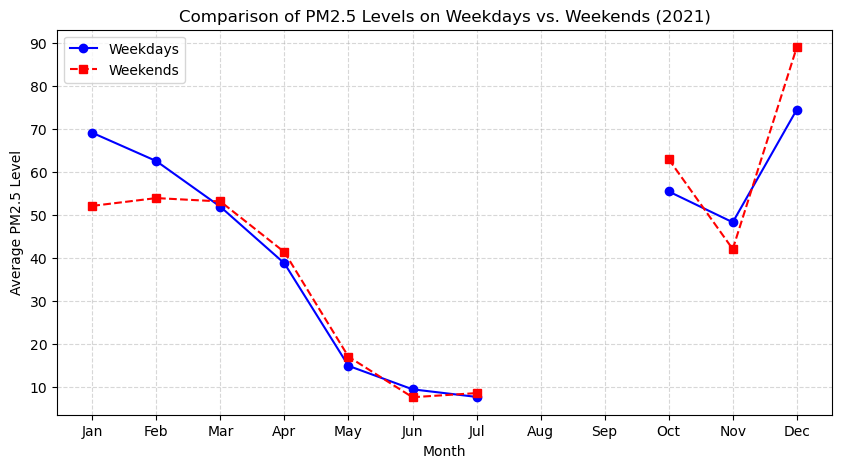

In [163]:
#Ans 3
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data.csv")

df["Timestamp"] = pd.to_datetime(df["Timestamp"])


df_2021 = df[(df["Timestamp"].dt.year == 2021) & 
             (df["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")].copy()

df_2021["day_of_week"] = df_2021["Timestamp"].dt.dayofweek

df_2021["day_type"] = "Weekday"
df_2021.loc[df_2021["day_of_week"] >= 5, "day_type"] = "Weekend"

df_2021["month"] = df_2021["Timestamp"].dt.month

monthly_avg = df_2021.groupby(["month", "day_type"])["PM2.5"].mean().unstack()

plt.figure(figsize=(10, 5))
plt.plot(monthly_avg.index, monthly_avg["Weekday"], marker="o", linestyle="-", label="Weekdays", color="blue")
plt.plot(monthly_avg.index, monthly_avg["Weekend"], marker="s", linestyle="--", label="Weekends", color="red")

plt.xlabel("Month")
plt.ylabel("Average PM2.5 Level")
plt.title("Comparison of PM2.5 Levels on Weekdays vs. Weekends (2021)")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                       "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


### Spacio-Temporal Aggregation

In [165]:
#Ans 1
df=pd.read_csv("Data.csv")

df['Date'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df_2022 = df[df['Year'] == 2022]

# Check if df_2022 is empty
if df_2022.empty:
    print("No data available for 2022. Please check your dataset.")
else:
    summer_months = [3, 4, 5]
    monsoon_months = [6, 7, 8, 9]
    df_summer = df_2022[df_2022['Month'].isin(summer_months)]
    df_monsoon = df_2022[df_2022['Month'].isin(monsoon_months)]
if df_summer.empty or df_monsoon.empty:
    print("No data available for summer or monsoon months in 2022. Please check your dataset.")
else:
    summer_avg_pm25 = df_summer.groupby('state')['PM2.5'].mean()
    monsoon_avg_pm25 = df_monsoon.groupby('state')['PM2.5'].mean()
    percentage_change = ((monsoon_avg_pm25 - summer_avg_pm25) / summer_avg_pm25) * 100
    state_most_diff = percentage_change.abs().idxmax()
    max_diff = percentage_change[state_most_diff]
    print(f"The state with the most difference in PM2.5 levels during monsoon compared to summer in 2022 is {state_most_diff} with a change of {max_diff:.2f}%")

The state with the most difference in PM2.5 levels during monsoon compared to summer in 2022 is Assam with a change of -61.18%


<Figure size 1200x600 with 0 Axes>

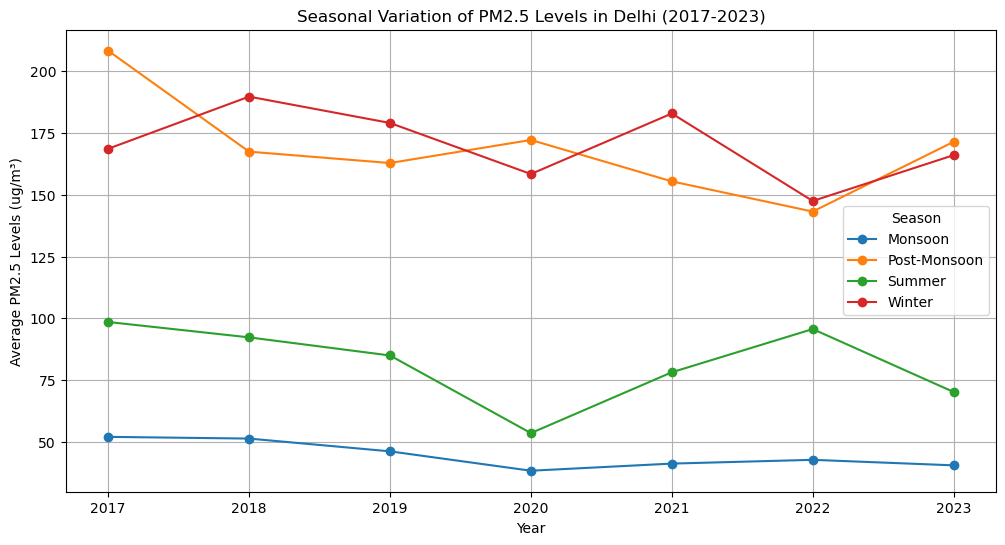

In [166]:
#Ans 2
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Data.csv")

df['Date'] = pd.to_datetime(df['Timestamp'])

df_delhi = df[(df['state'] == 'Delhi') & (df['Date'].dt.year >= 2017) & (df['Date'].dt.year <= 2023)].copy()

def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9]:
        return "Monsoon"
    else:
        return "Post-Monsoon"

df_delhi['Season'] = df_delhi['Date'].dt.month.apply(get_season)

seasonal_avg_pm25 = df_delhi.groupby([df_delhi['Date'].dt.year, 'Season'])['PM2.5'].mean().reset_index()

seasonal_avg_pm25 = seasonal_avg_pm25.pivot(index='Date', columns='Season', values='PM2.5')

plt.figure(figsize=(12, 6))
seasonal_avg_pm25.plot(marker='o', linestyle='-', figsize=(12, 6))
plt.title("Seasonal Variation of PM2.5 Levels in Delhi (2017-2023)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels (ug/m³)")
plt.grid(True)
plt.legend(title="Season")
plt.show()



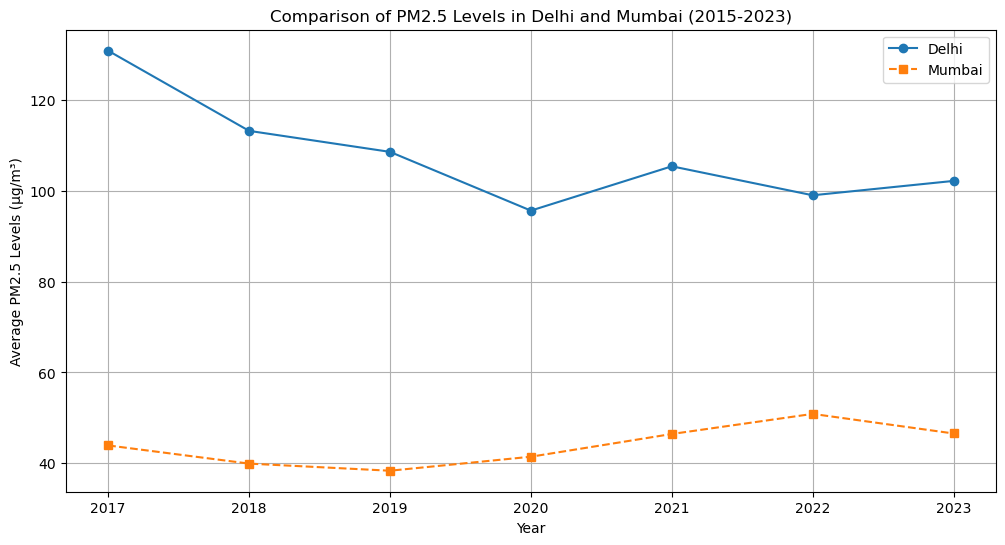

Standard Deviation of PM2.5 Levels (2015-2023):
Delhi: 11.72
Mumbai: 4.37

Delhi had more fluctuations in PM2.5 levels compared to Mumbai.


In [167]:
#ns 3
df = pd.read_csv("Data.csv")

df['Date'] = pd.to_datetime(df['Timestamp'])
df_delhi = df[(df['state'] == 'Delhi') & (df['Date'].dt.year >= 2015) & (df['Date'].dt.year <= 2023)]
df_mumbai = df[(df['state'] == 'Maharashtra') & (df['Date'].dt.year >= 2015) & (df['Date'].dt.year <= 2023)]
delhi_avg_pm25 = df_delhi.groupby(df_delhi['Date'].dt.year)['PM2.5'].mean()
mumbai_avg_pm25 = df_mumbai.groupby(df_mumbai['Date'].dt.year)['PM2.5'].mean()
plt.figure(figsize=(12, 6))
plt.plot(delhi_avg_pm25.index, delhi_avg_pm25.values, marker='o',linestyle='-', label='Delhi')
plt.plot(mumbai_avg_pm25.index, mumbai_avg_pm25.values, marker='s',linestyle='--', label='Mumbai')
plt.title("Comparison of PM2.5 Levels in Delhi and Mumbai (2015-2023)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels (µg/m³)")
plt.grid(True)
plt.legend()
plt.show()

delhi_std = delhi_avg_pm25.std()
mumbai_std = mumbai_avg_pm25.std()

print(f"Standard Deviation of PM2.5 Levels (2015-2023):")
print(f"Delhi: {delhi_std:.2f}")
print(f"Mumbai: {mumbai_std:.2f}")

if delhi_std > mumbai_std:
    print("\nDelhi had more fluctuations in PM2.5 levels compared to Mumbai.")
else:
    print("\nMumbai had more fluctuations in PM2.5 levels compared to Mumbai.")

### Population Based

In [169]:
#Ans 1
df_data=pd.read_csv('Data.csv')
df_state_data=pd.read_csv('State_data.csv')
df_state_data=pd.read_csv('State_data.csv')
df_state_data.rename(columns={'State':'state'}, inplace='True')
merged_df = pd.merge(df_data, df_state_data, on='state', how='outer')


stations_per_state = merged_df.groupby('state')['station'].nunique()
population_per_state = merged_df.groupby('state')['Population'].max()

stations_per_capita = stations_per_state / population_per_state
state_with_highest_ratio = stations_per_capita.idxmax()
print(state_with_highest_ratio)

Chandigarh


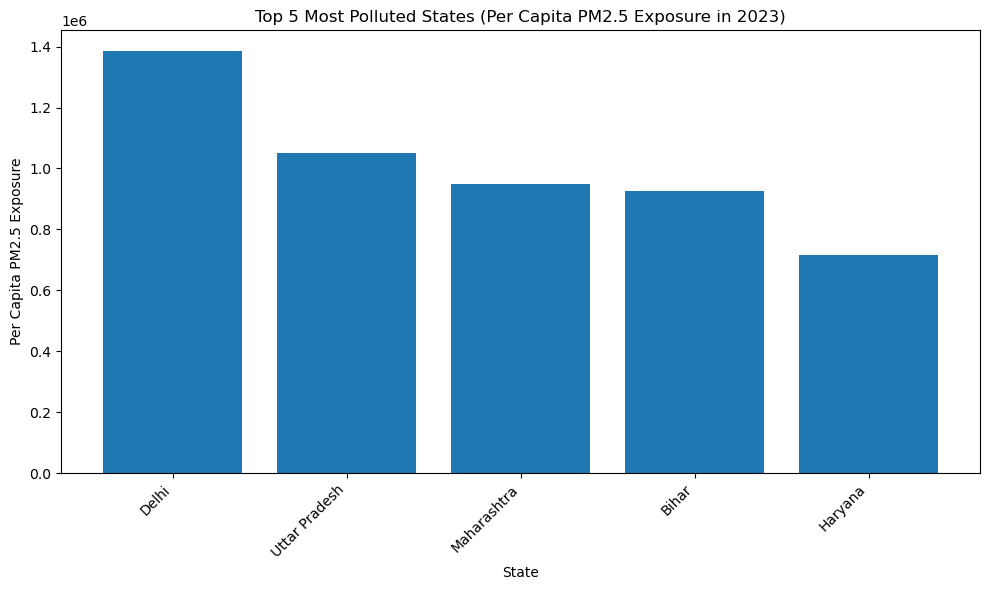

In [170]:
#Ans 2
merged_2023 = pd.merge(df_2023, df_state_data, on='state', how='outer')

# Calculating per capita PM2.5 exposure per state
per_capita_pm25 = (merged_2023.groupby('state')['PM2.5'].sum() * merged_2023.groupby('state')['Population'].sum()) / merged_2023.groupby('state')['Population'].sum()

# Selecting the top 5 polluted states
top_5_polluted = per_capita_pm25.sort_values(ascending=False).head(5)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(top_5_polluted.index, top_5_polluted.values)
plt.xlabel("State")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States (Per Capita PM2.5 Exposure in 2023)")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

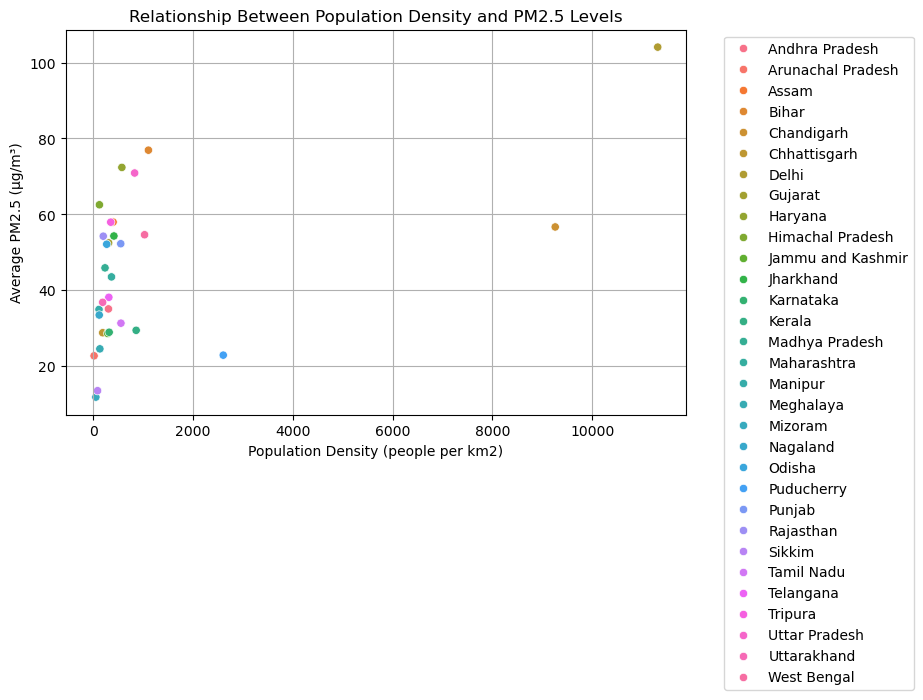

In [171]:
#Ans 3
state_avg_pm25 = df_data.groupby("state")["PM2.5"].mean()

merged_data = state_avg_pm25.to_frame().merge(df_state_data[["state", "Population", "Area (km2)"]], 
                                              left_index=True, 
                                              right_on="state")

merged_data["Population Density"] = merged_data["Population"] / merged_data["Area (km2)"]

plt.figure(figsize=(8, 5))
sns.scatterplot(x=merged_data["Population Density"], y=merged_data["PM2.5"], hue=merged_data["state"])

plt.xlabel("Population Density (people per km2)")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("Relationship Between Population Density and PM2.5 Levels")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#while population density might contribute to pollution in some cases, it is not the sole or dominant factor influencing PM2.5 levels based on this data.


### Area Based

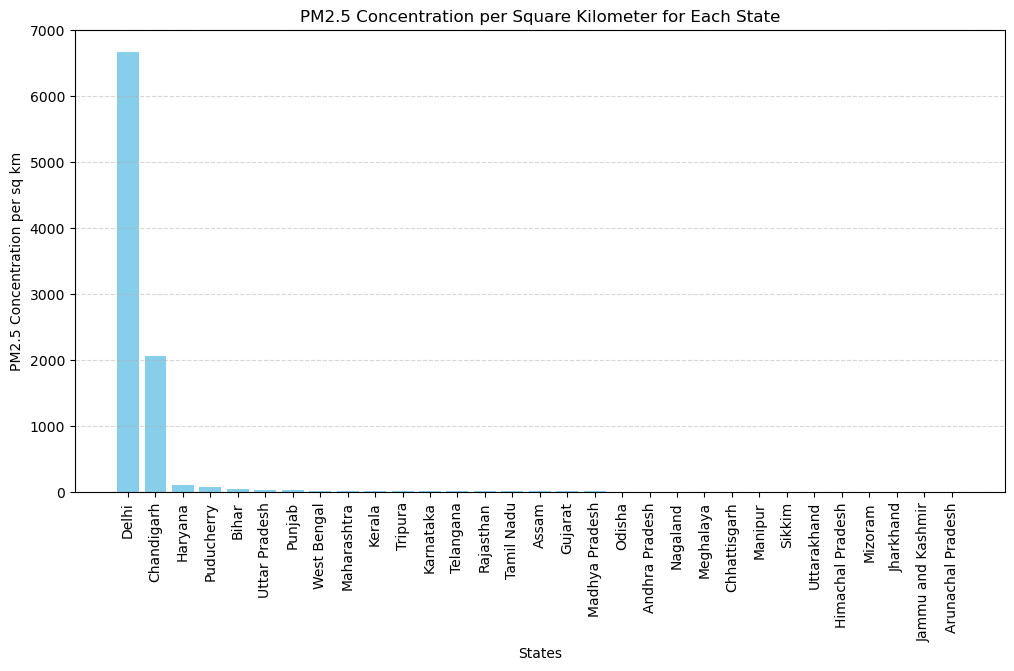

State with highest PM2.5 per sq km: state                    Delhi
PM2.5_per_sq_km    6673.121359
Name: 6, dtype: object


In [173]:
#Ans 1
df_data = pd.read_csv("Data.csv")
df_state = pd.read_csv("State_data.csv")

df_data["Timestamp"] = pd.to_datetime(df_data["Timestamp"])

state_pm25 = df_data.groupby("state")["PM2.5"].sum().reset_index()

df_state.rename(columns={"State": "state", "Area (km2)": "area_sq_km"}, inplace=True)

merged_data = pd.merge(state_pm25, df_state, on="state")

merged_data["PM2.5_per_sq_km"] = merged_data["PM2.5"] / merged_data["area_sq_km"]

merged_data = merged_data.sort_values(by="PM2.5_per_sq_km", ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(merged_data["state"], merged_data["PM2.5_per_sq_km"], color="skyblue")

plt.xlabel("States")
plt.ylabel("PM2.5 Concentration per sq km")
plt.title("PM2.5 Concentration per Square Kilometer for Each State")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

highest_pm_state = merged_data.iloc[0][["state", "PM2.5_per_sq_km"]]
print("State with highest PM2.5 per sq km:", highest_pm_state)

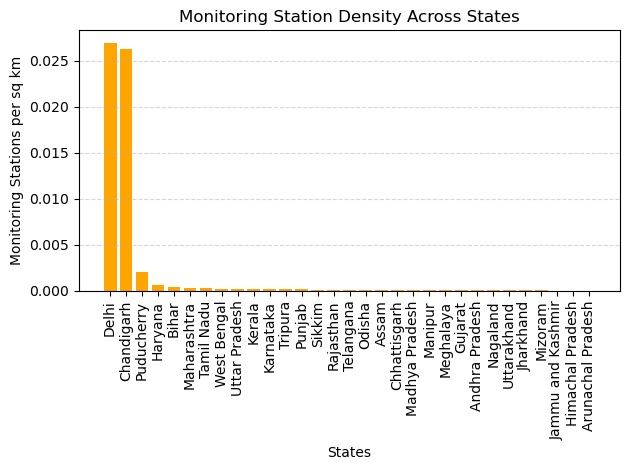

State with highest monitoring station density: state                    Delhi
stations_per_sq_km    0.026954
Name: 6, dtype: object


In [174]:
#Ans 2
df_data = pd.read_csv("Data.csv")
df_state = pd.read_csv("State_data.csv")

station_count = df_data.groupby("state")["station"].nunique().reset_index()
station_count.rename(columns={"station": "num_of_stations"}, inplace=True)

df_state.rename(columns={"State": "state", "Area (km2)": "area_sq_km"}, inplace=True)

merged_stations = pd.merge(station_count, df_state, on="state")

merged_stations["stations_per_sq_km"] = merged_stations["num_of_stations"] / merged_stations["area_sq_km"]

merged_stations = merged_stations.sort_values(by="stations_per_sq_km", ascending=False)


plt.figure()
plt.bar(merged_stations["state"], merged_stations["stations_per_sq_km"], color="orange")

plt.xlabel("States")
plt.ylabel("Monitoring Stations per sq km")
plt.title("Monitoring Station Density Across States")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

highest_station_density = merged_stations.iloc[0][["state", "stations_per_sq_km"]]
print("State with highest monitoring station density:", highest_station_density)

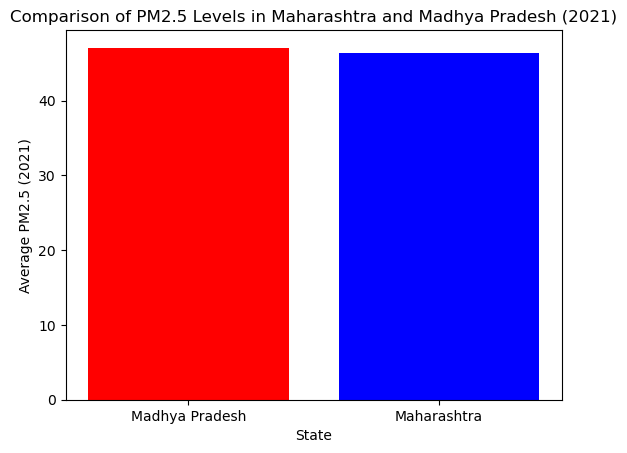

            state      PM2.5  population_density
0  Madhya Pradesh  47.095952          235.608557
1     Maharashtra  46.440044          365.192023


In [175]:
# Ans 3
df_data = pd.read_csv("Data.csv")
df_state = pd.read_csv("State_data.csv")

df_state.rename(columns={"State": "state", "Area (km2)": "area_sq_km", "Population": "population"}, inplace=True)

df_state["population_density"] = df_state["population"] / df_state["area_sq_km"]

df_data["Timestamp"] = pd.to_datetime(df_data["Timestamp"])

df_2021 = df_data[df_data["Timestamp"].dt.year == 2021]


df_relevant_states = df_2021[df_2021["state"].isin(["Maharashtra", "Madhya Pradesh"])]

average_pm25 = df_relevant_states.groupby("state")["PM2.5"].mean().reset_index()

average_pm25 = pd.merge(average_pm25, df_state[["state", "population_density"]], on="state", how="left")

plt.figure()
plt.bar(average_pm25["state"], average_pm25["PM2.5"], color=["red", "blue"])
plt.xlabel("State")
plt.ylabel("Average PM2.5 (2021)")
plt.title("Comparison of PM2.5 Levels in Maharashtra and Madhya Pradesh (2021)")
plt.show()

print(average_pm25)



Madhya Pradesh's PM2.5 levels are higher due to several reasons: biomass burning (including crop residue burning) is more prevalent in parts of Madhya Pradesh, adding to pollution. Also, being a landlocked state, Madhya Pradesh lacks coastal winds that help in pollutant dispersion, unlike Maharashtra, which benefits from sea breezes. Another reason could be that Maharashtra's urban areas, particularly Mumbai and Pune, may have stricter pollution control measures compared to Madhya Pradesh's cities.

From this, we can conclude that while population density influences pollution, it is not the sole determining factor. Industrial activities, geographical conditions, and regulatory measures play a significant role in determining PM2.5 levels.

### Funding Based Aggregation 


In [178]:
#Ans 1
df_f = pd.read_csv("NCAP_Funding.csv")
df_f.rename(columns={"State": "state", "Area (km2)": "area_sq_km"}, inplace=True)
df_fund = df_f.copy()
df_fund["Funding_in_2021"] = (df_fund["Amount released during FY 2021-22"] != "-")
df_fund_state = df_fund.groupby("state")["Funding_in_2021"].sum().reset_index()
state_pm25 = df.groupby("state")["PM2.5"].mean().reset_index()
final_df = pd.merge(df_fund_state, state_pm25, on="state" , how = "inner")
final_df["Funding_Receieved"] = final_df["Funding_in_2021"].apply(lambda x: "Received" if x != 0 else "Not Received")
Fund_Received = final_df.groupby("Funding_Receieved")["PM2.5"].mean().reset_index()
Fund_Received

,Funding_Receieved,PM2.5
0,Not Received,48.230295
1,Received,50.669501


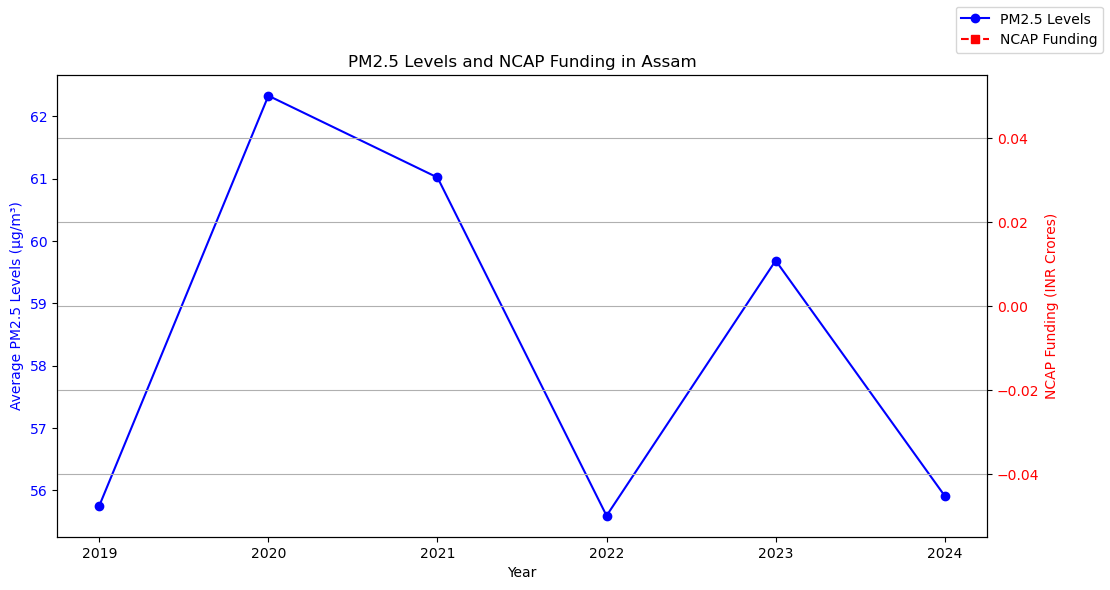

Correlation between PM2.5 levels and NCAP funding: nan


In [179]:
#Ans 2
df = pd.read_csv("Data.csv")
ncap_funding = pd.read_csv("NCAP_Funding.csv")
df['Date'] = pd.to_datetime(df['Timestamp'])
assam_data = df[df['state'] == 'Assam']
merged_data = pd.merge(assam_data, ncap_funding, left_on='state', right_on='State', how='left')

merged_data['Amount released during FY 2021-22'] = pd.to_numeric(merged_data['Amount released during FY 2021-22'], errors='coerce')
yearly_data = merged_data.groupby(merged_data['Date'].dt.year).agg({'PM2.5':'mean', 'Amount released during FY 2021-22': 'mean'})
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(yearly_data.index, yearly_data['PM2.5'], marker='o', linestyle='-', color='blue', label='PM2.5 Levels')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average PM2.5 Levels (µg/m³)', color='blue')
ax1.tick_params('y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(yearly_data.index, yearly_data['Amount released during FY 2021-22'],marker='s', linestyle='--', color='red', label='NCAP Funding')
ax2.set_ylabel('NCAP Funding (INR Crores)', color='red')
ax2.tick_params('y', labelcolor='red')
plt.title('PM2.5 Levels and NCAP Funding in Assam')
fig.legend(loc='upper right')
plt.grid(True)
plt.show()
correlation = yearly_data['PM2.5'].corr(yearly_data['Amount released during FY 2021-22'])
print(f"Correlation between PM2.5 levels and NCAP funding: {correlation:.2f}")

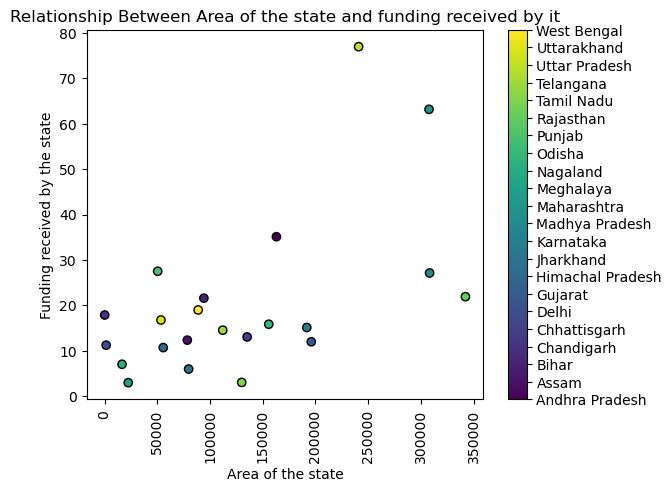

In [180]:
#Ans 3
df_f_new = df_f.groupby("state")["Total fund released"].sum().reset_index()
final_df = pd.merge(df_f_new, df_state, on="state" , how = "inner")
scatter = plt.scatter(final_df["area_sq_km"], final_df["Total fund released"], c=range(len(final_df)), cmap="viridis", edgecolors="black")
plt.xlabel("Area of the state")
plt.ylabel("Funding received by the state")
plt.title("Relationship Between Area of the state and funding received by it")
cbar = plt.colorbar(scatter)
cbar.set_ticks(range(len(final_df["state"])))
cbar.set_ticklabels(final_df["state"])
plt.xticks(rotation =90)
plt.show()

### misc

In [182]:
df_data['city'] = df_data['city'].str.lower()

df_data['Timestamp'] = df_data['Timestamp'].astype(str)

df_data_2023 = df_data[
    df_data['Timestamp'].str.contains("2023")
]

avg_pm25_city = (
    df_data_2023.groupby('city')['PM2.5']
    .mean()
    .reset_index()
)

most_polluted_city = avg_pm25_city.sort_values(by='PM2.5', ascending=False).iloc[0]['city']

most_polluted_city_data = df_data_2023[df_data_2023['city'] == most_polluted_city].copy()

most_polluted_city_data['PM2.5'] = most_polluted_city_data['PM2.5'].astype(float)
hazardous_days = most_polluted_city_data[most_polluted_city_data['PM2.5'] > 300]['Timestamp'].nunique()

total_days = most_polluted_city_data['Timestamp'].nunique()

percentage_hazardous_days = (hazardous_days / total_days) * 100

print(f"Most Polluted City in 2023: {most_polluted_city.capitalize()}")
print(f"Percentage of Hazardous Days: {percentage_hazardous_days:.2f}%")

Most Polluted City in 2023: Darbhanga
Percentage of Hazardous Days: 0.82%


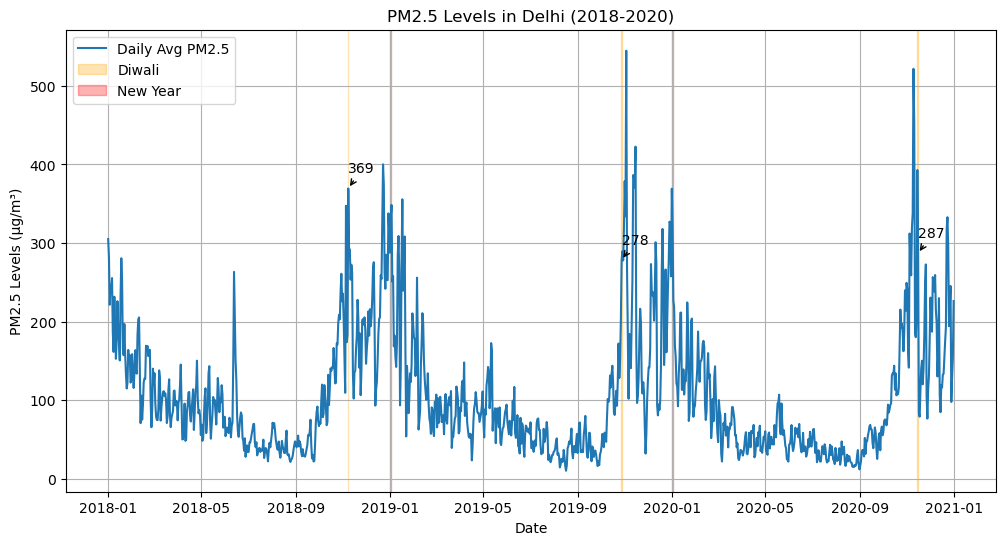

In [183]:
#Ans 2
df = pd.read_csv("Data.csv")
df['Date'] = pd.to_datetime(df['Timestamp'])
delhi_data = df[(df['state'] == 'Delhi') & (df['Date'].dt.year >= 2018) & (df['Date'].dt.year <= 2020)]
daily_avg_pm25 = delhi_data.groupby('Date')['PM2.5'].mean()
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_pm25.index, daily_avg_pm25.values, label='Daily Avg PM2.5')
diwali_periods = [
    (pd.Timestamp('2018-11-07'), pd.Timestamp('2018-11-08')),
    (pd.Timestamp('2019-10-27'), pd.Timestamp('2019-10-28')),
    (pd.Timestamp('2020-11-14'), pd.Timestamp('2020-11-15'))
]
new_year_periods = [
    (pd.Timestamp('2019-01-01'), pd.Timestamp('2019-01-02')),
    (pd.Timestamp('2020-01-01'), pd.Timestamp('2020-01-02'))
]
for start, end in diwali_periods:
    plt.axvspan(start, end, color='orange', alpha=0.3, label='Diwali' if start == diwali_periods[0][0] else "") # Highlight Diwali period
for start, end in new_year_periods:
    plt.axvspan(start, end, color='red', alpha=0.3, label='New Year' if start == new_year_periods[0][0] else "") # Highlight New Year period
spike_dates = [
    pd.Timestamp('2018-11-08'),
    pd.Timestamp('2019-10-28'),
    pd.Timestamp('2020-11-15')
]
for date in spike_dates:
    spike_value = daily_avg_pm25[date]
    plt.annotate(f'{spike_value:.0f}', xy=(date, spike_value), xytext=(date, spike_value + 20) , arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title('PM2.5 Levels in Delhi (2018-2020)')
plt.xlabel('Date')
plt.ylabel('PM2.5 Levels (µg/m³)')
plt.legend()
plt.grid(True)
# Show the plot
plt.show()

In [202]:
#Ans 3 part 1
ncap_funding= pd.read_csv('NCAP_Funding.csv')
ncap_funding_State= ncap_funding.groupby('State')[['Amount released during FY 2019-20', 'Amount released during FY 2020-21', 
                                        'Amount released during FY 2021-22']].agg(['sum'])
print(ncap_funding_State[('Amount released during FY 2020-21', 'sum')].idxmax(), 'recieved the highest NCAP funding in 2020.')

Assam recieved the highest NCAP funding in 2020.


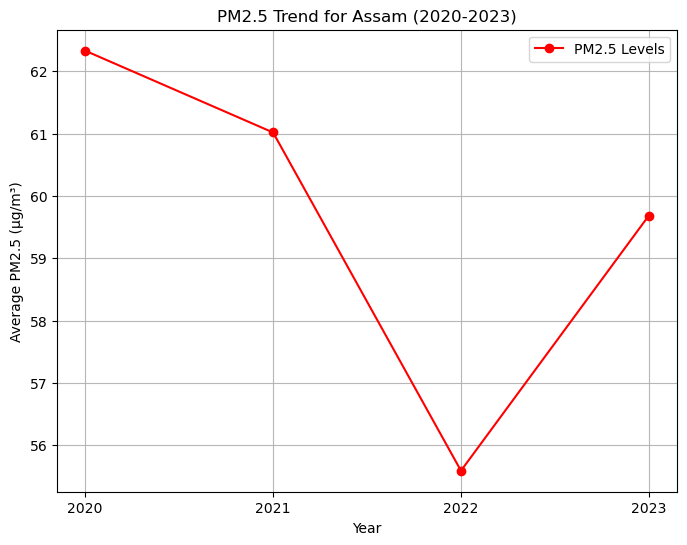

In [227]:
#Ans3 part 2
ncap_funding_df = pd.read_csv('NCAP_Funding.csv')
data_df = pd.read_csv('Data.csv')
highest_funded_state = ncap_funding_df.groupby('State')['Amount released during FY 2020-21'].sum().idxmax()
data_df['Timestamp'] = pd.to_datetime(data_df['Timestamp'], format='%Y-%m-%d')
df_highest_funded = data_df[(data_df['state'] == highest_funded_state) & (data_df['Timestamp'].dt.year.isin(range(2020, 2024)))]
pm25_trend = df_highest_funded.groupby(df_highest_funded['Timestamp'].dt.year)['PM2.5'].mean().reset_index()
plt.figure(figsize=(8,6))
plt.plot(pm25_trend["Timestamp"], pm25_trend["PM2.5"], marker="o", color="red" , label="PM2.5 Levels")
plt.xlabel("Year")
plt.xticks(range(2020, 2024, 1))
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title(f"PM2.5 Trend for {highest_funded_state} (2020-2023)")
plt.legend()
plt.grid(True, alpha=0.9)
plt.show()


The air pollution levels have imporoved in comparison to 2020 but it is much worse than 2022

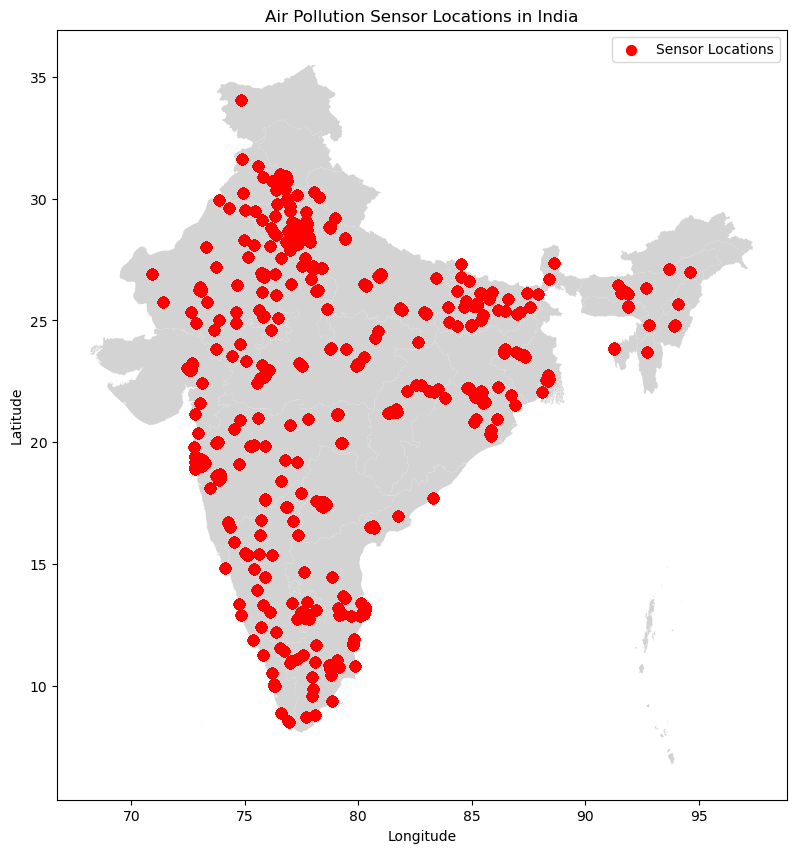

In [214]:
#Ans 4
import geopandas

map_plot_data = df_data.copy()
map_plot_data['latitude'] = pd.to_numeric(map_plot_data['latitude'], errors='coerce')
map_plot_data['longitude'] = pd.to_numeric(map_plot_data['longitude'], errors='coerce')
map_plot_data = map_plot_data.dropna(subset=['latitude', 'longitude'])

gdf = geopandas.GeoDataFrame(
    map_plot_data,
    geometry=geopandas.points_from_xy(map_plot_data.longitude, map_plot_data.latitude),
    crs='EPSG:4326',
)  

india = geopandas.read_file('./gadm41_IND_shp/gadm41_IND_1.shp')  
india = india.to_crs('EPSG:4326')

fig, ax = plt.subplots(1, figsize=(10, 10))
india.plot(color='lightgray', ax=ax)  # Plot India map
gdf.plot(ax=ax, color='red', markersize=50, label='Sensor Locations')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Air Pollution Sensor Locations in India')
ax.legend()

plt.show()

### Tell Us Something New

Cities with NCAP Funding has a similar decreasing curve as non-funded cities for year-by-year PM2.5 Levels so there is a possibility that NCAP Funding is not useful. We cannot be sure about this because NCAP Funded Cities have a significantly higher PM2.5 Level.

We have plotted a Graph below to prove this.

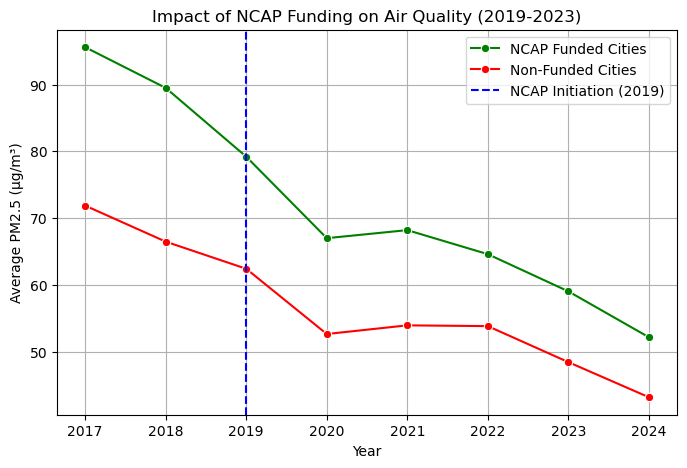

In [258]:
# Step 1: Mark cities that received NCAP funding
funded_cities = ncap_funding["City"].str.lower().unique()
df_data["NCAP_Funded"] = df_data["city"].str.lower().isin(funded_cities)

# Step 2: Compute yearly average PM2.5 for funded vs non-funded cities
funding_impact = df_data.groupby(["Year", "NCAP_Funded"])["PM2.5"].mean().unstack()

# Step 3: Plot the trend
plt.figure(figsize=(8,5))
sns.lineplot(x=funding_impact.index, y=funding_impact[True], label="NCAP Funded Cities", marker="o", color="green")
sns.lineplot(x=funding_impact.index, y=funding_impact[False], label="Non-Funded Cities", marker="o", color="red")

plt.axvline(x=2019, linestyle="--", color="blue", label="NCAP Initiation (2019)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("Impact of NCAP Funding on Air Quality (2019-2023)")
plt.legend()
plt.grid(True)
plt.show()